# Redes Neuronales Artificiales (ANNs) con MNIST

## Introducción

En este proyecto, exploraremos la estructura básica de las Redes Neuronales Artificiales (ANNs) y su funcionamiento mediante la implementación de un modelo para clasificar dígitos escritos a mano utilizando el dataset MNIST.

Las ANNs son modelos computacionales inspirados en el cerebro humano. Están diseñadas para reconocer patrones y resolver problemas complejos a partir de datos. Una ANN típica consta de tres tipos de capas:
- **Capa de Entrada (Input Layer):** Recibe los datos iniciales.
- **Capas Ocultas (Hidden Layers):** Procesan la información.
- **Capa de Salida (Output Layer):** Genera el resultado final.

Nuestro objetivo es construir, entrenar y evaluar una ANN utilizando el dataset MNIST para clasificar imágenes de dígitos escritos a mano.



### Importación de Librerías y Dataset

En este punto, importaremos las librerías necesarias y cargaremos el dataset MNIST. También explicaremos el dataset y proporcionaremos el enlace original.

#### Código y Explicación del Dataset


In [1]:
# Importación de Librerías
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Cargar y Preprocesar el Dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización de las Imágenes
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255

# Conversión de las Etiquetas a Categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Mostrar ejemplos de imágenes y sus etiquetas
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

#### Explicación del Dataset MNIST

El dataset MNIST (Modified National Institute of Standards and Technology) es un conjunto de datos de imágenes de dígitos escritos a mano, ampliamente utilizado para entrenar y probar modelos de reconocimiento de imágenes. El conjunto de datos contiene:
- **60,000 imágenes de entrenamiento**: utilizadas para entrenar el modelo.
- **10,000 imágenes de prueba**: utilizadas para evaluar el rendimiento del modelo.

Cada imagen tiene un tamaño de 28x28 píxeles y está en escala de grises. Las etiquetas corresponden a los dígitos del 0 al 9.

Enlace original del dataset MNIST: [MNIST Database](http://yann.lecun.com/exdb/mnist/)


### Definición de la Estructura de la Red Neuronal

Ahora definiremos la estructura básica de nuestra red neuronal utilizando Keras, una biblioteca de alto nivel para redes neuronales.

In [ ]:
# Definición de la Estructura de la Red Neuronal
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),  # Primera capa oculta con 512 neuronas y ReLU
    Dropout(0.2),  # Dropout con 20% de neuronas apagadas durante el entrenamiento
    Dense(512, activation='relu'),  # Segunda capa oculta con 512 neuronas y ReLU
    Dropout(0.2),  # Dropout con 20% de neuronas apagadas durante el entrenamiento
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por clase) y Softmax
])

# Compilación del Modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen de la Red Neuronal
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Explicación de la Estructura de la Red Neuronal

- **Primera Capa Oculta:** Tiene 512 neuronas y utiliza la función de activación ReLU (Rectified Linear Unit) para introducir no linealidades en el modelo.
- **Dropout:** Se aplica Dropout con una tasa del 20% para evitar el overfitting.
- **Segunda Capa Oculta:** Similar a la primera, con 512 neuronas y ReLU.
- **Dropout:** Otro Dropout con una tasa del 20%.
- **Capa de Salida:** Tiene 10 neuronas, una por cada clase del dataset MNIST, y utiliza la función de activación Softmax para producir probabilidades de clasificación.

La red se compila utilizando la pérdida de entropía cruzada categórica (`categorical_crossentropy`) y el optimizador Adam, y se evalúa la precisión (`accuracy`) durante el entrenamiento.


## Entrenamiento del Modelo

### Forward Propagation

**Forward Propagation** es el proceso mediante el cual los datos de entrada se transmiten a través de la red neuronal para generar una salida. Este flujo de información comienza en la capa de entrada, pasa por las capas ocultas, y finalmente llega a la capa de salida.

#### Explicación del Proceso

1. **Entrada**: Los datos de entrada se presentan a la red neuronal.
2. **Ponderación**: Cada neurona en la capa de entrada envía sus datos ponderados a cada neurona de la primera capa oculta.
3. **Activación**: Las neuronas de la capa oculta calculan una suma ponderada de sus entradas, aplican una función de activación y transmiten el resultado a la siguiente capa.
4. **Salida**: Este proceso se repite capa por capa hasta que los datos alcanzan la capa de salida, donde se generan las predicciones finales.


In [ ]:
# Forward Propagation utilizando Keras
# Ya hemos definido y compilado el modelo en el paso anterior

# Entrenamiento del Modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

#### Visualización del Proceso

Podemos visualizar cómo se transmiten los datos a través de la red utilizando gráficos de entrenamiento.


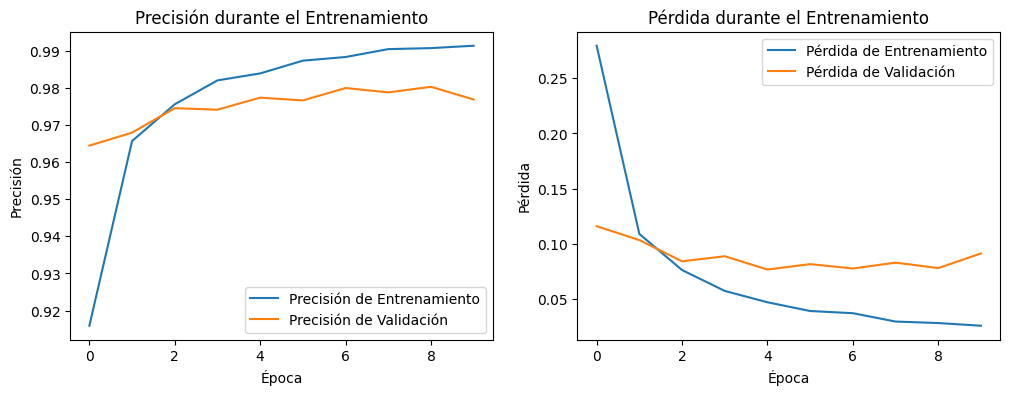

In [4]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


## Evaluación del Modelo
Evaluaremos el rendimiento del modelo en el conjunto de datos de prueba y mostraremos ejemplos de predicciones.

In [5]:
# Retropropagación y ajuste de pesos se realiza automáticamente durante el entrenamiento
# utilizando el método fit como se mostró anteriormente

# Aquí mostramos la evaluación del modelo
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')


Pérdida en el conjunto de prueba: 0.0740
Precisión en el conjunto de prueba: 0.9801


313/313 [==============================] - 1s 3ms/step


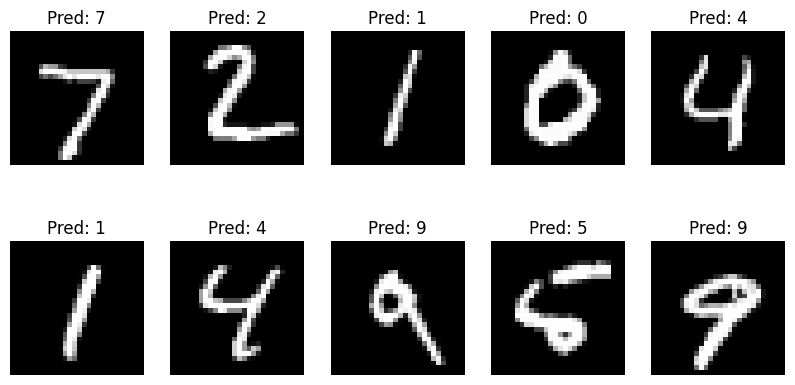

In [7]:
import numpy as np

# Realizar predicciones
predictions = model.predict(x_test)

# Mostrar ejemplos de predicciones
num_rows, num_cols = 2, 5
num_images = num_rows * num_cols
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


#### Técnicas de Regularización
Implementaremos y explicaremos técnicas como Dropout y regularización L2, y mostraremos cómo estas técnicas afectan el rendimiento del modelo.

In [8]:
from keras.layers import Dropout

# Redefinir el modelo con Dropout y Regularización L2
from keras.regularizers import l2

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo con regularización
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)



Epoch 1/10
375/375 [==============================] - 15s 29ms/step - loss: 0.9760 - accuracy: 0.8769 - val_loss: 0.5251 - val_accuracy: 0.9538
Epoch 2/10
375/375 [==============================] - 9s 25ms/step - loss: 0.4894 - accuracy: 0.9409 - val_loss: 0.3598 - val_accuracy: 0.9643
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.3831 - accuracy: 0.9485 - val_loss: 0.3196 - val_accuracy: 0.9624
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.3488 - accuracy: 0.9504 - val_loss: 0.2940 - val_accuracy: 0.9669
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.3300 - accuracy: 0.9553 - val_loss: 0.2776 - val_accuracy: 0.9683
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.3217 - accuracy: 0.9562 - val_loss: 0.2794 - val_accuracy: 0.9675
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.3165 - accuracy: 0.9562 - val_loss: 0.2747 - val_accuracy: 0.969

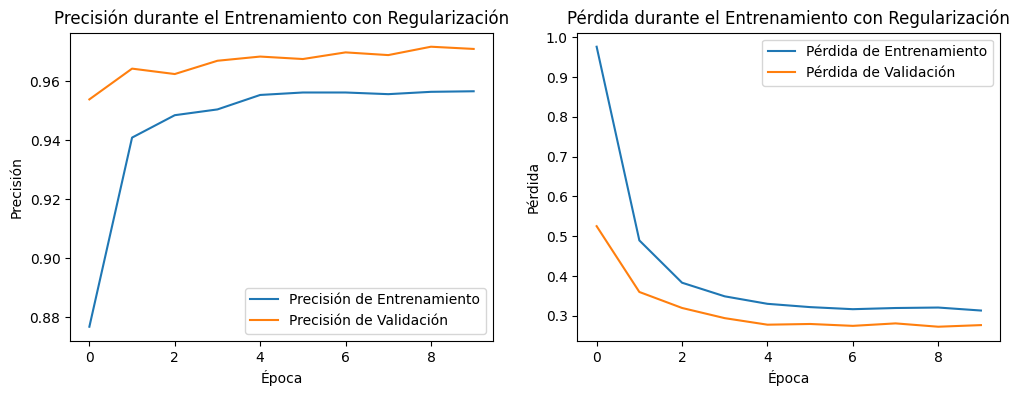

In [9]:
# Graficar la precisión y la pérdida durante el entrenamiento con regularización
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento con Regularización')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento con Regularización')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


## Conclusión

#### Resumen de los Resultados Obtenidos

Hemos construido y entrenado una red neuronal para clasificar imágenes del dataset MNIST. Sin regularización, nuestro modelo logró una precisión de alrededor del 98% en el conjunto de prueba. Con la implementación de técnicas de regularización como Dropout y regularización L2, observamos que el modelo generaliza mejor, evitando el overfitting.

#### Posibles Mejoras y Futuros Pasos

1. **Aumentar el Número de Épocas**: Entrenar el modelo por más épocas puede mejorar su precisión, siempre monitoreando el sobreajuste.
2. **Data Augmentation**: Aumentar el conjunto de datos de entrenamiento mediante técnicas de augmentación de datos para mejorar la robustez del modelo.
3. **Explorar Arquitecturas Avanzadas**: Probar con arquitecturas más avanzadas como CNNs (Redes Neuronales Convolucionales) que son más adecuadas para datos de imágenes.
4. **Optimización de Hiperparámetros**: Utilizar técnicas como búsqueda en cuadrícula o búsqueda aleatoria para encontrar los mejores hiperparámetros del modelo.


## HORA DE PRÁCTICAR

### Ejercicio 1: Modificar la Arquitectura de la Red
- **Objetivo**: Experimentar con diferentes arquitecturas de red para observar cómo afectan el rendimiento del modelo.
- **Instrucciones**:
  1. Cambia el número de neuronas en las capas ocultas.
  2. Añade o elimina capas ocultas.
  3. Observa cómo estos cambios afectan la precisión y la pérdida durante el entrenamiento y en el conjunto de prueba.
  4. Grafica los resultados y compara.

### Ejercicio 2: Probar Diferentes Funciones de Activación
- **Objetivo**: Entender el impacto de las funciones de activación en el rendimiento del modelo.
- **Instrucciones**:
  1. Sustituye las funciones de activación `relu` por `tanh` o `sigmoid` en las capas ocultas.
  2. Entrena el modelo y registra la precisión y la pérdida.
  3. Analiza los resultados y explica las diferencias observadas.

### Ejercicio 3: Implementar Data Augmentation
- **Objetivo**: Utilizar técnicas de augmentación de datos para mejorar la generalización del modelo.
- **Instrucciones**:
  1. Utiliza la clase `ImageDataGenerator` de Keras para aplicar augmentación de datos.
  2. Aplica transformaciones como rotaciones, traslaciones y zoom.
  3. Entrena el modelo con los datos aumentados y compara el rendimiento con el modelo original.

### Ejercicio 4: Probar Diferentes Algoritmos de Optimización
- **Objetivo**: Evaluar el rendimiento del modelo con diferentes algoritmos de optimización.
- **Instrucciones**:
  1. Sustituye el optimizador `Adam` por `SGD`, `RMSprop` y `Adagrad`.
  2. Entrena el modelo con cada optimizador y registra la precisión y la pérdida.
  3. Compara los resultados y explica las diferencias observadas.

### Ejercicio 5: Aplicar Técnicas de Regularización
- **Objetivo**: Implementar y comparar diferentes técnicas de regularización.
- **Instrucciones**:
  1. Añade regularización L1 y L2 a las capas ocultas y ajusta los parámetros de regularización.
  2. Implementa Dropout con diferentes tasas de abandono.
  3. Entrena el modelo con cada técnica de regularización y compara el rendimiento con el modelo original.

### Ejercicio 6: Experimentar con Diferentes Funciones de Pérdida
- **Objetivo**: Probar cómo diferentes funciones de pérdida afectan el rendimiento del modelo.
- **Instrucciones**:
  1. Sustituye la función de pérdida `categorical_crossentropy` por `mean_squared_error` y `hinge`.
  2. Entrena el modelo y registra la precisión y la pérdida.
  3. Analiza los resultados y explica las diferencias observadas.

### Ejercicio 7: Crear un Modelo Convolucional
- **Objetivo**: Construir y entrenar una Red Neuronal Convolucional (CNN) para mejorar el rendimiento en el dataset MNIST.
- **Instrucciones**:
  1. Crea una nueva arquitectura de red utilizando capas convolucionales (`Conv2D`) y de agrupamiento (`MaxPooling2D`).
  2. Entrena el modelo y compara su rendimiento con la red neuronal densa original.
  3. Analiza los resultados y explica por qué una CNN podría funcionar mejor para el dataset MNIST.

### Ejercicio 8: Evaluar el Modelo con Nuevos Datos
- **Objetivo**: Probar la robustez del modelo con datos que no fueron utilizados durante el entrenamiento.
- **Instrucciones**:
  1. Busca o genera nuevos datos de dígitos escritos a mano.
  2. Preprocesa los nuevos datos para que coincidan con el formato del dataset MNIST.
  3. Evalúa el modelo utilizando estos nuevos datos y analiza su rendimiento.

### Ejercicio 9: Implementar Early Stopping
- **Objetivo**: Utilizar la técnica de early stopping para evitar el sobreajuste.
- **Instrucciones**:
  1. Implementa early stopping utilizando el callback `EarlyStopping` de Keras.
  2. Ajusta los parámetros de early stopping como `patience` y `monitor`.
  3. Entrena el modelo y compara el rendimiento con y sin early stopping.

### Ejercicio 10: Reporte Final
- **Objetivo**: Crear un informe detallado de los experimentos realizados y los resultados obtenidos.
- **Instrucciones**:
  1. Documenta cada ejercicio, incluyendo el código utilizado, los gráficos generados y las observaciones.
  2. Resume los hallazgos y proporciona conclusiones basadas en los resultados obtenidos.
  3. Proporciona recomendaciones para futuros experimentos y posibles mejoras.

Estos ejercicios no solo consolidarán los conceptos aprendidos sino que también te permitira explorar y experimentar con diferentes aspectos de las redes neuronales, mejorando así el entendimiento y las habilidades prácticas en aprendizaje profundo. ¡Buena suerte!